This lab on Logistic Regression is a Python adaptation of p. 161-163 of "Introduction to Statistical Learning with Applications in R" by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani. Adapted by R. Jordan Crouser at Smith College for SDS293: Machine Learning (Spring 2016).

In [27]:
import pandas as pd
import numpy as np

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,\
    QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,\
    classification_report, precision_score, ConfusionMatrixDisplay

%matplotlib inline

# 4.6.3 Linear Discriminant Analysis
Let's return to the `Smarket` data from `ISLR`. 

In [11]:
def ISLRdata(name):
    import statsmodels.datasets as smd
    df = smd.get_rdataset(name, 'ISLR')
    df.data.__doc__ = df.__doc__
    df.data.__name__ = df.title
    return df.data
   
df = ISLRdata('Smarket')
df

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


In [ ]:
# url = 'https://github.com/prokaj/ipynb/week1'

# df = pd.read_csv('Smarket.csv', 
#                  usecols=range(1,10), 
#                  index_col=0, 
#                  parse_dates=True)
# df.head()

Now we will perform LDA on the `Smarket` data from the `ISLR` package. In `Python`, we can fit a LDA model using the `LinearDiscriminantAnalysis()` function, which is part of the `discriminant_analysis` module of the `sklearn` library. As we did with logistic regression and KNN, we'll fit the model using only the observations before 2005, and then test the model on the data from 2005.

In [16]:
idx = df.Year<2005
X_train = df[idx][['Lag1','Lag2']]
y_train = df[idx]['Direction']

X_test = df[~idx][['Lag1','Lag2']]
y_test = df[~idx]['Direction']

lda = LinearDiscriminantAnalysis()
model = lda.fit(X_train, y_train)

print(model.priors_)

[0.49198397 0.50801603]


The LDA output indicates prior probabilities of ${\hat{\pi}}_1 = 0.492$ and ${\hat{\pi}}_2 = 0.508$; in other words,
49.2% of the training observations correspond to days during which the
market went down.

In [17]:
print(model.means_)

[[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]


The above provides the group means; these are the average
of each predictor within each class, and are used by LDA as estimates
of $\mu_k$. These suggest that there is a tendency for the previous 2 days’
returns to be negative on days when the market increases, and a tendency
for the previous days’ returns to be positive on days when the market
declines. 

In [18]:
print(model.coef_)

[[-0.05544078 -0.0443452 ]]


The coefficients of linear discriminants output provides the linear
combination of `Lag1` and `Lag2` that are used to form the LDA decision rule.

If $−0.0554\times{\tt Lag1}−0.0443\times{\tt Lag2}$ is large, then the LDA classifier will
predict a market increase, and if it is small, then the LDA classifier will
predict a market decline. **Note**: these coefficients differ from those produced by `R`.
    
The `predict()` function returns a list of LDA’s predictions about the movement of the market on the test data:

In [47]:
pred = model.predict(X_test)
print(dict(zip(*np.unique(pred, return_counts=True))))

{'Down': 70, 'Up': 182}

The model assigned 70 observations to the "Down" class, and 182 observations to the "Up" class. Let's check out the confusion matrix to see how this model is doing. We'll want to compare the **predicted class** (which we can find in `pred`) to the **true class** (found in `y\_test})$.

              precision    recall  f1-score   support

        Down      0.500     0.315     0.387       111
          Up      0.582     0.752     0.656       141

    accuracy                          0.560       252
   macro avg      0.541     0.534     0.522       252
weighted avg      0.546     0.560     0.538       252



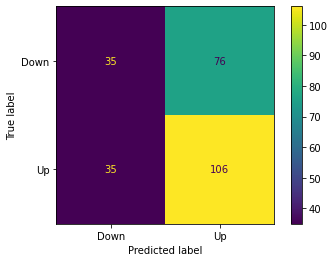

In [43]:
# print(confusion_matrix(pred, y_test, labels=lda.classes_))
print(classification_report(y_test, pred, digits=3))
ConfusionMatrixDisplay.from_estimator(lda, X_test, y_test)
None

In [40]:
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 2'] #, 'class 2']
print(classification_report(y_true, y_pred, 
                            labels=[0,2],
                            target_names=target_names))
            

              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 2       1.00      0.67      0.80         3

   micro avg       0.75      0.75      0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



In [42]:
import sklearn.metrics as metrics
metrics.f1_score?

Signature:
metrics.f1_score(
    y_true,
    y_pred,
    *,
    labels=None,
    pos_label=1,
    average='binary',
    sample_weight=None,
    zero_division='warn',
)
Docstring:
Compute the F1 score, also known as balanced F-score or F-measure.

The F1 score can be interpreted as a weighted average of the precision and
recall, where an F1 score reaches its best value at 1 and worst score at 0.
The relative contribution of precision and recall to the F1 score are
equal. The formula for the F1 score is::

    F1 = 2 * (precision * recall) / (precision + recall)

In the multi-class and multi-label case, this is the average of
the F1 score of each class with weighting depending on the ``average``
parameter.

Read more in the :ref:`User Guide <precision_recall_f_measure_metrics>`.

Parameters
----------
y_true : 1d array-like, or label indicator array / sparse matrix
    Ground truth (correct) target values.

y_pred : 1d array-like, or label indicator array / sparse matrix
    Estimated ta

# 4.6.4 Quadratic Discriminant Analysis
We will now fit a QDA model to the `Smarket` data. QDA is implemented
in `sklearn` using the `QuadraticDiscriminantAnalysis()` function, which is again part of the `discriminant_analysis` module. The
syntax is identical to that of `LinearDiscriminantAnalysis()`.

In [ ]:
qda = QuadraticDiscriminantAnalysis()
model2 = qda.fit(X_train, y_train)
print(model2.priors_)
print(model2.means_)

The output contains the group means. But it does not contain the coefficients
of the linear discriminants, because the QDA classifier involves a
_quadratic_, rather than a linear, function of the predictors. The `predict()`
function works in exactly the same fashion as for LDA.

In [ ]:
pred2=model2.predict(X_test)
print(np.unique(pred2, return_counts=True))
print(confusion_matrix(pred2, y_test))
print(classification_report(y_test, pred2, digits=3))

Interestingly, the QDA predictions are accurate almost 60% of the time,
even though the 2005 data was not used to fit the model. This level of accuracy
is quite impressive for stock market data, which is known to be quite
hard to model accurately. 

This suggests that the quadratic form assumed
by QDA may capture the true relationship more accurately than the linear
forms assumed by LDA and logistic regression. However, we recommend
evaluating this method’s performance on a larger test set before betting
that this approach will consistently beat the market!

# An Application to Carseats Data
Let's see how the `LDA/QDA` approach performs on the `Carseats` data set, which is
included with `ISLR`. 

Recall: this is a simulated data set containing sales of child car seats at 400 different stores.

In [ ]:
df2 = pd.read_csv('Carseats.csv')
df2.head()

See if you can build a model that predicts `ShelveLoc`, the shelf location (Bad, Good, or Medium) of the product at each store. Don't forget to hold out some of the data for testing!

In [ ]:
# Your code here

To get credit for this lab, please post your answers to the prompt in [#lab5](https://sds293.slack.com/messages/C7CR96LJ3).